In [18]:
get_ipython().magic('matplotlib inline')
import os
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn.cluster import KMeans, MiniBatchKMeans
import nltk
import re
import codecs
from sklearn import feature_extraction
import mpld3
import seaborn as sns

In [30]:
science = np.load("science2k-doc-word.npy")

In [161]:
ff = open('science2k-vocab.txt', 'r')
vocab = ff.readlines()

In [162]:
f = open('science2k-titles.txt', 'r')
titles = f.readlines()

In [163]:
worddoc = np.load("science2k-word-doc.npy")

In [8]:
len(science)

1373

In [87]:
residuals = []

In [92]:
for n in range(2, 21):
    km = KMeans(n_clusters=n)
    km.fit(science)
    residuals.append(km.inertia_)

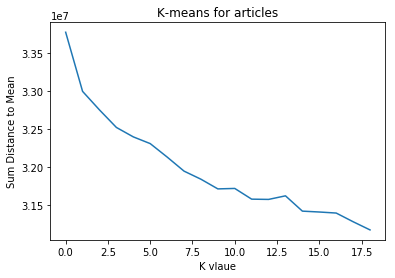

In [187]:
plt.plot(residuals)
plt.xlabel("K vlaue")
plt.ylabel("Sum Distance to Mean")
plt.title("K-means for articles")

In [98]:
# Use the elbow rule I would chosse 8 

In [99]:
km8 = KMeans(n_clusters=8)
km8.fit(science)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [254]:
labels = km8.predict(science)

In [350]:
def getTitles(k):
    km8.cluster_centers_[k]
    cj = list(np.where(labels == k))
    if(len(cj[0])<11):
        print(k+1, " centroid")
        for i in cj[0]:
            print(titles[i])
    else:
        distance = []
        for n in range(0,len(cj[0])):
            distance.append(np.linalg.norm(science[cj][n]-km8.cluster_centers_[0]))
        books = np.array(distance).argsort()[:10]
        bookindex = cj[0][books]
        print(k+1, " centroid")
        for i in bookindex:
            print(titles[i])

In [352]:
for k in range(0,8): getTitles(k)

1  centroid
"Algorithmic Gladiators Vie for Digital Glory"

"Reopening the Darkest Chapter in German Science"

"National Academy of Sciences Elects New Members"

"Corrections and Clarifications: A Short Fe-Fe Distance in Peroxodiferric Ferritin: Control of Fe Substrate versus Cofactor Decay?"

"Corrections and Clarifications: Charon's First Detailed Spectra Hold Many Surprises"

"Corrections and Clarifications: Unearthing Monuments of the Yarmukians"

"Heretical Idea Faces Its Sternest Test"

"Archaeology in the Holy Land"

"Information Technology Takes a Different Tack"

"Corrections and Clarifications: Biotech Research Proves a Draw in Canada"

2  centroid
"Isotopic Evidence for Variations in the Marine Calcium Cycle over the Cenozoic"

"Mass Balance of the Greenland Ice Sheet at High Elevations"

"Remobilization in the Cratonic Lithosphere Recorded in Polycrystalline Diamond"

"Temporal Trends in Deep Ocean Redfield Ratios"

"Extinct <latex>$^{129}I$</latex> in Halite from a Primiti

In [188]:
residuals2 = []

In [189]:
for n in range(2, 21):
    km2 = KMeans(n_clusters=n)
    km2.fit(worddoc)
    residuals2.append(km2.inertia_)

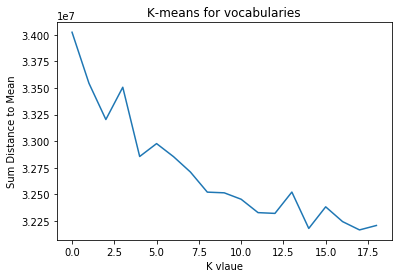

In [190]:
plt.plot(residuals2)
plt.xlabel("K vlaue")
plt.ylabel("Sum Distance to Mean")
plt.title("K-means for vocabularies")

In [357]:
km11 = KMeans(n_clusters=11)
km11.fit(worddoc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [358]:
labels = km11.predict(worddoc)

In [362]:
def getVocab(k):
    km11.cluster_centers_[k]
    cj = list(np.where(labels == k))
    if(len(cj[0])<11):
        print(k+1, " centroid")
        for i in cj[0]:
            print(vocab[i])
    else:
        distance = []
        for n in range(0,len(cj[0])):
            distance.append(np.linalg.norm(worddoc[cj][n]-km11.cluster_centers_[0]))
        books = np.array(distance).argsort()[:10]
        bookindex = cj[0][books]
        print(k+1, " centroid")
        for i in bookindex:
            print(vocab[i])

In [363]:
for k in range(0,11): getVocab(k)

1  centroid
dispersion

photon

approximation

dynamical

momentum

velocities

angular

finite

coherent

nonlinear

2  centroid
geneticist

campaign

security

pace

clinton

prize

trust

fight

revolution

recalls

3  centroid
developed

4  centroid
start

arrows

labeled

characterized

possibility

concentrations

confirmed

bars

concentration

resulted

5  centroid
thymocytes

agonists

myeloid

immunoreactive

cd3

jnk

fitc

lacz

bcl

neurodegenerative

6  centroid
years

year

7  centroid
research

center

national

million

8  centroid
hairpin

carbonyl

mg2

topology

introns

conformations

ribbon

groove

linker

electrostatic

9  centroid
chem

natl

acad

proc

res

rev

mol

biol

sci

notes

10  centroid
promoter

phenotype

pcr

kinase

polymerase

lacking

signaling

mrna

mutants

yeast

11  centroid
end

org

sciencemag

ag7

neas

nompc

lcts

dnag

proteorhodopsin

trxr

